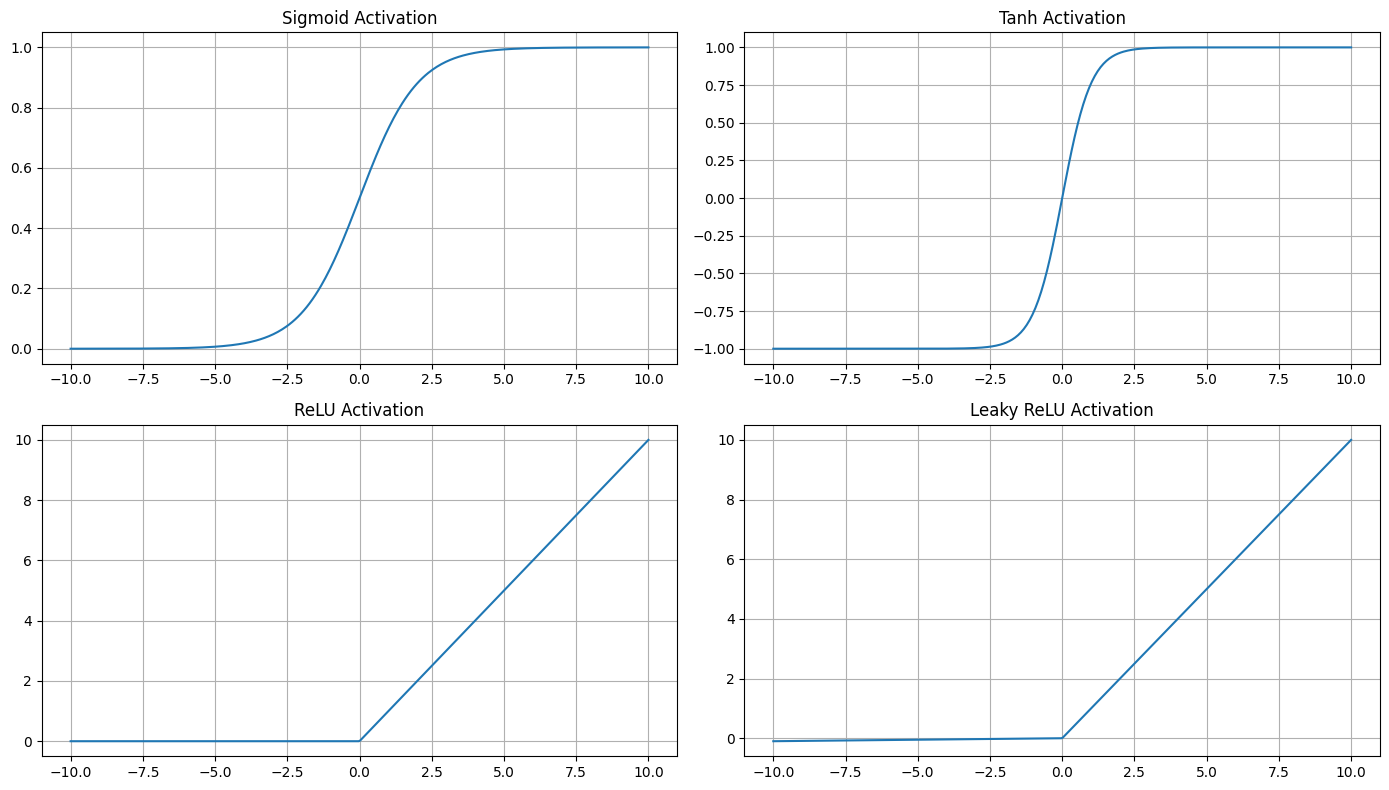

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
#SIGMOID:
#YES: binary classification in the output layer (a. Natural Probability (0,1), b. Natural threshold)
#Sensitive around 'x=0'
#Smooth derivative & helps GD
#YES: Multi-label classification (sum(o/p) is not 1)
#NO: hidden layers because of the vanishing gradient problem (Near 1/0)
#Not zero-centered. Activation is always +ve. So Zig-zag learning

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#TANH:
#YES: Regression, bipolar data, (RNN, GAN, Autoencoder)
#Sensitive around 'x=0'
#Zero-centered. Steeper change in activation. So Zig-zag learning
#Smooth derivative & helps GD
#NO: hidden layers because of the vanishing gradient problem (Near -1/+1)
#NO: Binary classification (Range -1,1) & Binary cross-entropy loss tunes for (0,1)

def tanh(x):
    return np.tanh(x)


#RELU:
#YES: hidden layers - No vanishing gradient problem
#Simple math. Fast. leads to sparsity (eliminates -ve & '0')
#Derivative 0 or 1.
#NO: Not at the output layer
#Non-zero centered
#"dying ReLU" problem: Activation is always +ve. Training may get stuck.
#Activations grow without limit

def relu(x):
    return np.maximum(0, x)

#LEAKY_RELU: (Use if Relu is not enough)
#YES: DEEPER hidden layers - No vanishing gradient problem
#Simple math. Fast. Keeps small -ve value.
#Eliminates "dying ReLU"
#NO: Not at the output layer
#Non-zero centered
#alpha= ~0.01 to 0.3 (Sometimes impacts training)
#Activations grow without limit

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Generate data
x = np.linspace(-10, 10, 400)

# Plotting
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Activation')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(x, tanh(x))
plt.title('Tanh Activation')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(x, relu(x))
plt.title('ReLU Activation')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU Activation')
plt.grid()

plt.tight_layout()
plt.show()


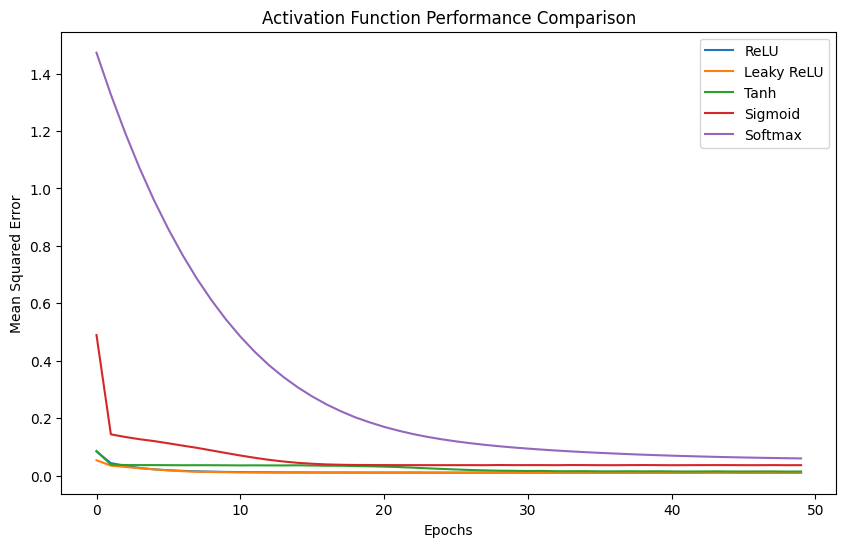

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

# 1. Generate a simple 1D dataset
X = np.linspace(-1, 1, 1000)
y = X**3 + 0.1 * np.random.randn(1000)  # cubic function with some noise

# 2. Neural Network Models
def build_model(activation_function):
    model = Sequential()

    if activation_function == "leaky_relu":
        model.add(Dense(32, input_dim=1))
        model.add(LeakyReLU(alpha=0.01))
    elif activation_function == "softmax":
        model.add(Dense(2, input_dim=1, activation=activation_function))  # 2 outputs for softmax
        model.add(Dense(1))
        model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
        return model
    else:
        model.add(Dense(32, input_dim=1, activation=activation_function))

    model.add(Dense(32, activation=activation_function))
    model.add(Dense(1))

    model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
    return model

relu_model = build_model("relu")
leaky_relu_model = build_model("leaky_relu")
tanh_model = build_model("tanh")
sigmoid_model = build_model("sigmoid")
softmax_model = build_model("softmax")

# 3. Training
relu_history = relu_model.fit(X, y, epochs=50, verbose=0)
leaky_relu_history = leaky_relu_model.fit(X, y, epochs=50, verbose=0)
tanh_history = tanh_model.fit(X, y, epochs=50, verbose=0)
sigmoid_history = sigmoid_model.fit(X, y, epochs=50, verbose=0)
softmax_history = softmax_model.fit(X, y, epochs=50, verbose=0)

# 4. Performance Comparison
plt.figure(figsize=(10, 6))
plt.plot(relu_history.history['loss'], label="ReLU")
plt.plot(leaky_relu_history.history['loss'], label="Leaky ReLU")
plt.plot(tanh_history.history['loss'], label="Tanh")
plt.plot(sigmoid_history.history['loss'], label="Sigmoid")
plt.plot(softmax_history.history['loss'], label="Softmax")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Activation Function Performance Comparison")
plt.show()


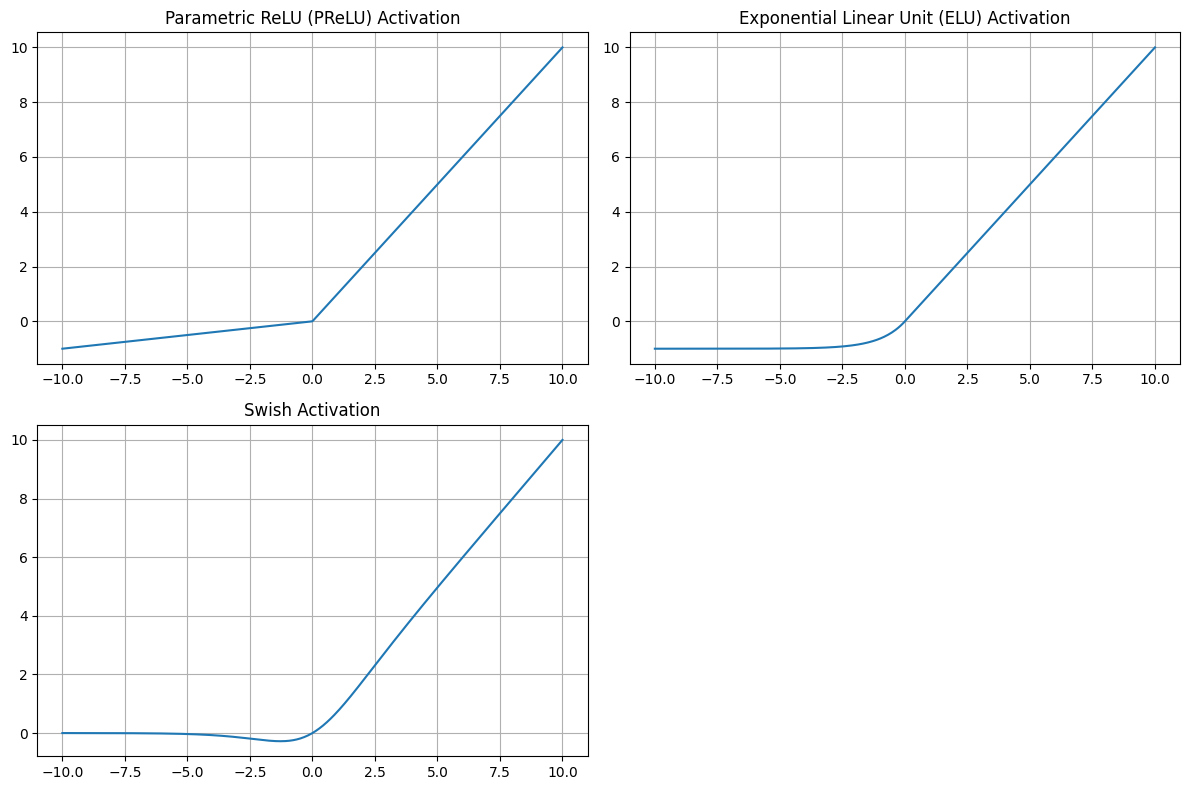

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def prelu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x, beta=1.0):
    return x * sigmoid(beta * x)

# Generate data
x = np.linspace(-10, 10, 400)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, prelu(x))
plt.title('Parametric ReLU (PReLU) Activation')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(x, elu(x))
plt.title('Exponential Linear Unit (ELU) Activation')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(x, swish(x))
plt.title('Swish Activation')
plt.grid()

plt.tight_layout()
plt.show()


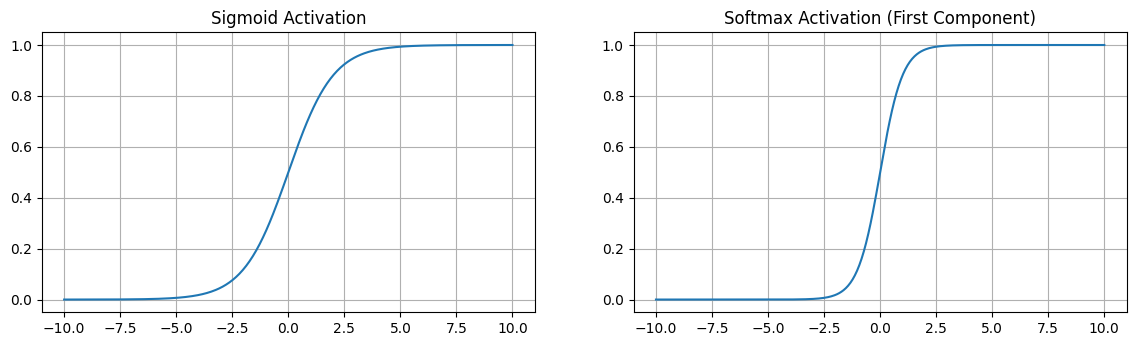

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function (sum(o/p) is always 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the softmax function (2 class for visualization)
def softmax(z):
    e_z = np.exp(z)
    sum_e_z = e_z + np.exp(-z)
    return e_z / sum_e_z

# Generate data
x = np.linspace(-10, 10, 400)

# Plotting
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Activation')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(x, softmax(x))
plt.title('Softmax Activation ')
plt.grid()

plt.show()
